# How to recover from errors in Tools

## Step-1

Pass the error we got from our tool back to chatGPT

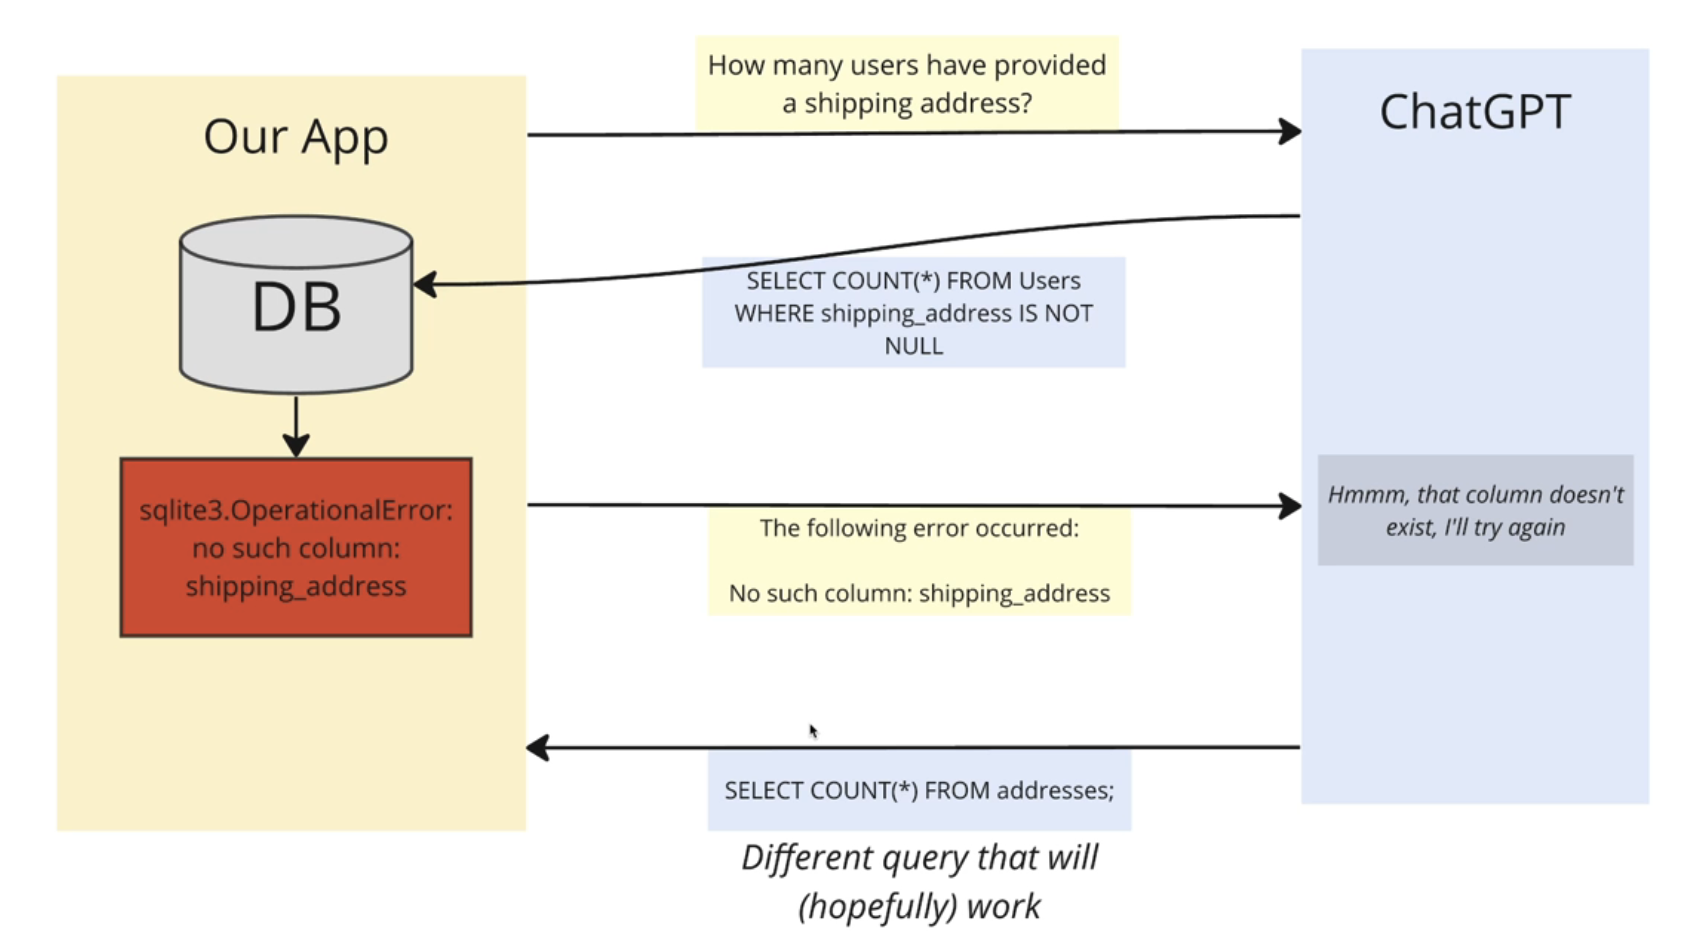

We add the try and except block like below to acheive step-1

```python
# Define a function that is actually going to be executed whenver ChatGPT decided that it needs to execute a query.
def run_sqlite_query(query):
    # This returns an object which gives us access to the database
    c = conn.cursor()
    try:
        # Execute the query
        c.execute(query)

        # We are collecting all the information for all the different rows that get returned, and we are sending
        # it back to ChatGPT by returning it from this funciton.
        return c.fetchall()
    except sqlite3.OperationalError as err:
        # The below return will directly be send back to ChatGPT
        return f"The following error occured: {str(err)}"
```

## Step-2: Adding Table context

* We will add `system message` and a new Tool called `describe_tables` along with HumanMessage

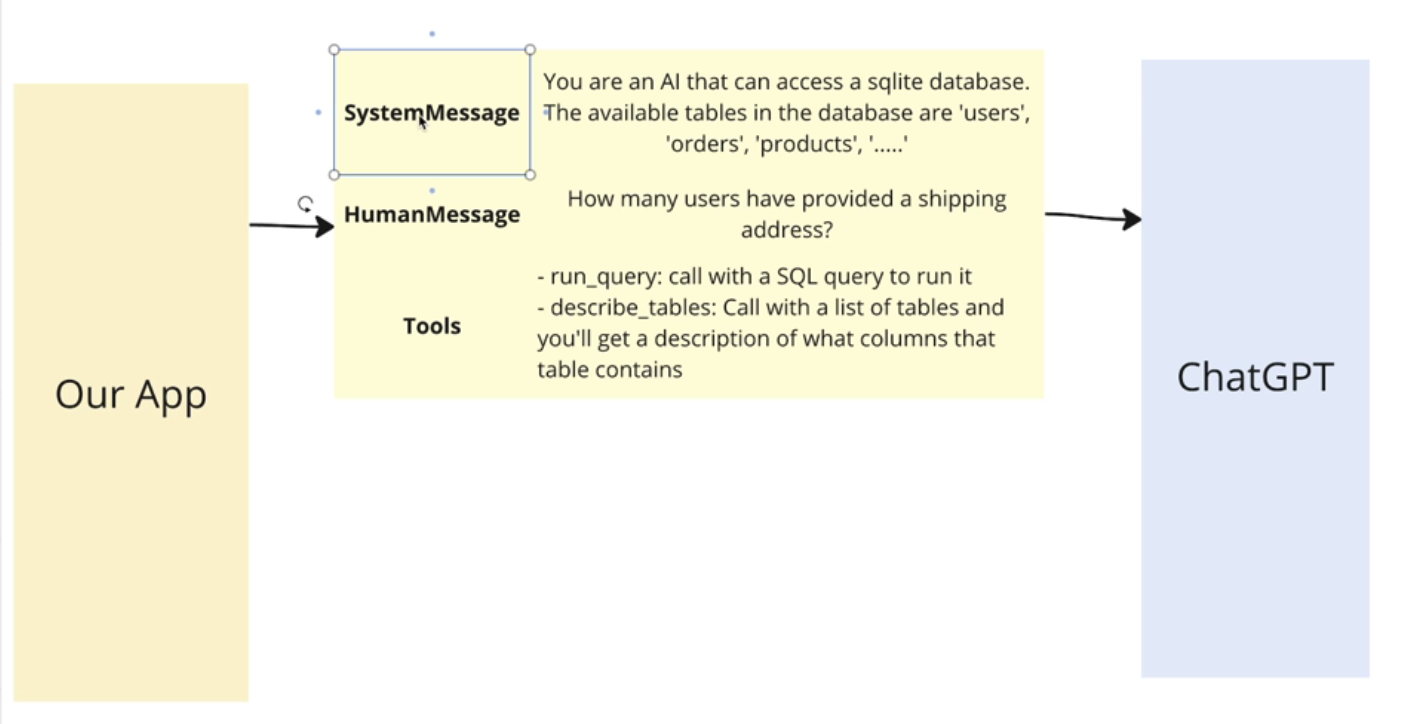

### a. adding a system-message 

Pass the list of `tables` in the SystemMessage for chatgpt to betetr understand what tables are involved

```python
prompt = ChatPromptTemplate(
    messages=[
        # Use this `SystemMessage` schema when there is no `input_variables` or `templating` is needed. Use this when we are hardcoding a string.
        SystemMessage(
            content=f"You are an AI that has access to a SQLite database. \n {tables}"
        ),
        HumanMessagePromptTemplate.from_template(
            "{input}"
        ),  # human-input will be coming in `input` variable
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ],
)
```

### b. adding a table description tool